In [10]:
"""
A more advance Neural Network that will used the titanic dataset to predict, if a person survives or no base on categories.
"""
import seaborn as sns

df = sns.load_dataset('titanic')

# Checking for null values
display(df.isnull())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Clean data / Remove missing values
# clean_df = df.dropna()
# display(clean_df)

In [12]:
# Drop columns with too many nulls over 60%
clean_df = df.drop(columns=['deck'])

# Fill or drop remaining nulls
clean_df['age'] = clean_df['age'].fillna(clean_df['age'].median())
clean_df['embarked'] = clean_df['embarked'].fillna(clean_df['embarked'].mode()[0])
display(clean_df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [13]:
print("(Rows, Columns):", clean_df.shape)

(Rows, Columns): (891, 14)


In [14]:
print("All current columns:", clean_df.columns.to_list())

# Hidden layer: Calculates if it will survive or not base on categories: fare, pclass, age, sex and alone
# Output layer: Says if survives base on hidden layer calculations, will say 0 or 1

X = clean_df[['pclass','sex', 'age', 'fare', 'alone']].copy()

print("\nColumns that will be used to predict (survived): ",X.columns.to_list())
display(X)



All current columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']

Columns that will be used to predict (survived):  ['pclass', 'sex', 'age', 'fare', 'alone']


,pclass,sex,age,fare,alone
0,3,male,22.0,7.2500,False
1,1,female,38.0,71.2833,False
2,3,female,26.0,7.9250,True
3,1,female,35.0,53.1000,False
4,3,male,35.0,8.0500,True
...,...,...,...,...,...
886,2,male,27.0,13.0000,True
887,1,female,19.0,30.0000,True
888,3,female,28.0,23.4500,False
889,1,male,26.0,30.0000,True


In [15]:
# Encode Sex and Alone with 0 and 1
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['alone'] = X['alone'].map({False: 0, True: 1})
display(X)

,pclass,sex,age,fare,alone
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,0
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,1
...,...,...,...,...,...
886,2,0,27.0,13.0000,1
887,1,1,19.0,30.0000,1
888,3,1,28.0,23.4500,0
889,1,0,26.0,30.0000,1


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[["age", "fare"]] = scaler.fit_transform(X[["age", "fare"]])
display(X)


,pclass,sex,age,fare,alone
0,3,0,-0.565736,-0.502445,0
1,1,1,0.663861,0.786845,0
2,3,1,-0.258337,-0.488854,1
3,1,1,0.433312,0.420730,0
4,3,0,0.433312,-0.486337,1
...,...,...,...,...,...
886,2,0,-0.181487,-0.386671,1
887,1,1,-0.796286,-0.044381,1
888,3,1,-0.104637,-0.176263,0
889,1,0,-0.258337,-0.044381,1


In [17]:
from sklearn.model_selection import train_test_split

y = clean_df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
# NN(Neural Network Model)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model = Sequential([
    Input(shape = (X.shape[1],)), # Input Layer:  auto matches feature size 
    Dense(16, activation='relu'), # Hidden Layer 1: 16 Neurons 
    Dropout(0.2), # For Regularization
    Dense(8, activation='relu'), # Hidden Layer 2: 8 Neurons
    Dense(1, activation='sigmoid') # Output Layer: 1 Neuron
])

In [19]:
# Much cleaner print than watching verbose print every line.
class PrintEvery(tf.keras.callbacks.Callback):
    def __init__(self, interval=50):
        self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            print(f"Epoch {epoch+1} → Loss: {logs['loss']:.4f} - Accuracy: {logs['accuracy']:.4f}")

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0, callbacks=[PrintEvery(10)])

Epoch 10 → Loss: 0.5645 - Accuracy: 0.7012
Epoch 20 → Loss: 0.5368 - Accuracy: 0.7381
Epoch 30 → Loss: 0.5238 - Accuracy: 0.7715
Epoch 40 → Loss: 0.5126 - Accuracy: 0.7715
Epoch 50 → Loss: 0.5014 - Accuracy: 0.7627
Epoch 60 → Loss: 0.4842 - Accuracy: 0.7856
Epoch 70 → Loss: 0.4825 - Accuracy: 0.7838
Epoch 80 → Loss: 0.4638 - Accuracy: 0.7733
Epoch 90 → Loss: 0.4635 - Accuracy: 0.7891
Epoch 100 → Loss: 0.4604 - Accuracy: 0.7926


In [21]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)

import pandas as pd

# Create a DataFrame to compare
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted_Prob': y_pred.flatten(),
    'Predicted_Label': y_pred_class.flatten()
})

# Show first few rows
display(predictions_df.head(10))



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Actual,Predicted_Prob,Predicted_Label
0,1,0.147234,0
1,0,0.169816,0
2,0,0.151653,0
3,1,0.778071,1
4,1,0.516755,1
5,1,0.945943,1
6,1,0.600370,1
7,0,0.195511,0
8,1,0.569995,1
9,1,0.896685,1


In [22]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {(acc * 100):.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.4395 

Test Accuracy: 78.77%


In [23]:
print("Reflection:\n")
print(f'My model achieved a {(acc * 100):.2f}% accuracy in predicting survival on the Titanic dataset test set.\nConsidering the dataset was relatively small {X.shape} after cleaning, this is a strong result for a simple feedforward network.\nSo a model with limited data (based on how data hungry Neural Networks normally are), a well-preprocessed input and simple architecture can generalize reasonably well.')


Reflection:

My model achieved a 78.77% accuracy in predicting survival on the Titanic dataset test set.
Considering the dataset was relatively small (891, 5) after cleaning, this is a strong result for a simple feedforward network.
So a model with limited data (based on how data hungry Neural Networks normally are), a well-preprocessed input and simple architecture can generalize reasonably well.


In [26]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest on the same training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"\nRandom Forest Test Accuracy: {(rf_acc * 100):.2f}%")



Random Forest Test Accuracy: 81.01%


In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert to DMatrix (XGBoost's optimized format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

# Train model
xg_model = xgb.train(params, dtrain, num_boost_round=100)

# Predict
y_pred_prob = xg_model.predict(dtest)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Accuracy
xg_accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {xg_accuracy * 100:.2f}%")


XGBoost Accuracy: 82.68%


In [42]:
import shap

# Create a TreeExplainer for your trained XGBoost model
explainer = shap.Explainer(xg_model)

# Get SHAP values for your test set
shap_values = explainer(X_test)


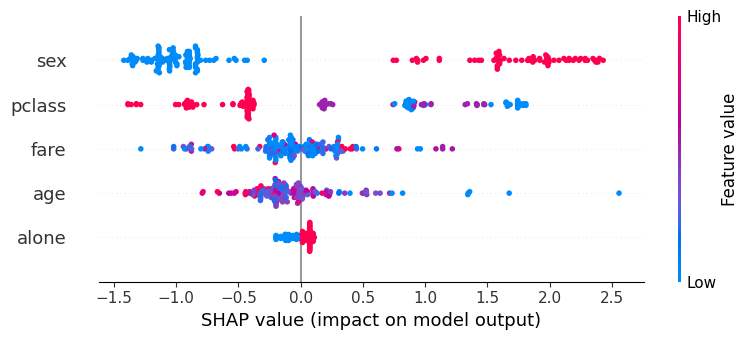

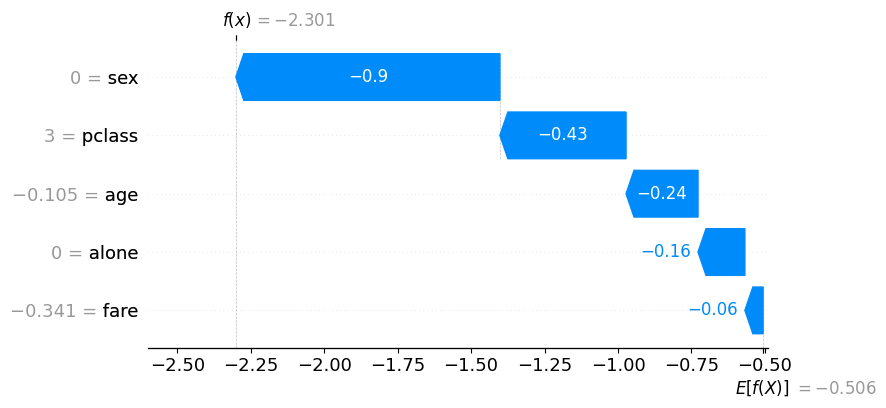

In [43]:
# Summary plot to see overall feature importance
shap.summary_plot(shap_values, X_test)

# Force plot to see prediction explanation for one individual
shap.plots.waterfall(shap_values[0])  # for the first test example
